In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV , RepeatedStratifiedKFold , train_test_split
from sklearn.metrics import precision_score , confusion_matrix
from sklearn import tree

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [8]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [16]:
d = df["output"].value_counts().reset_index()

In [19]:
fig = px.pie(
    d,
    values="count",
    names="output",
    hole=0.3,
    opacity=0.8,
    labels={"output": "output", "count": "Number of Samples"}
)
fig.update_layout(title=dict(text="Pie Chart of output Feature"))
fig.update_traces(textposition="outside", textinfo="percent+label")
fig.show()

#fig.write_html("Potability_pie_chart.html")

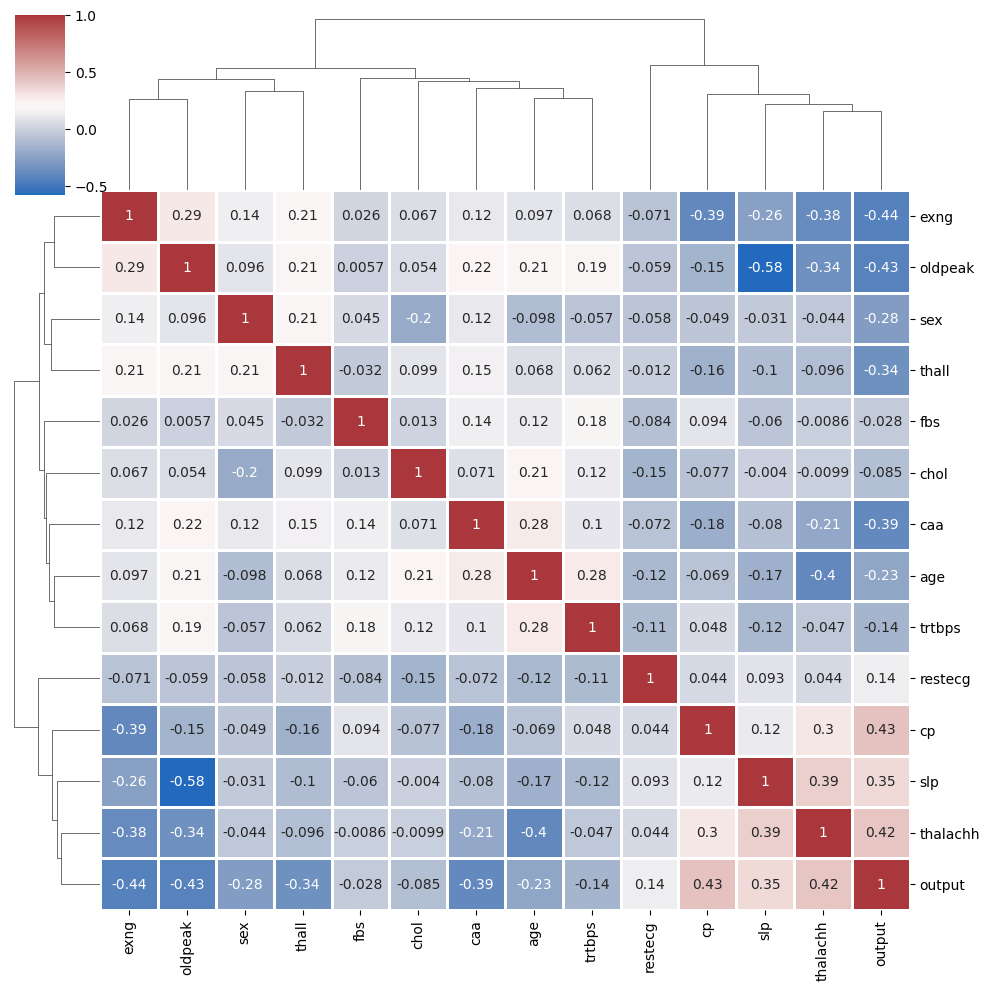

In [20]:
sns.clustermap(df.corr() , cmap = "vlag" , dendrogram_ratio= (0.1,0.2) , annot = True , linewidths = 0.8 , figsize = (10,10))
plt.show()

<Axes: xlabel='caa'>

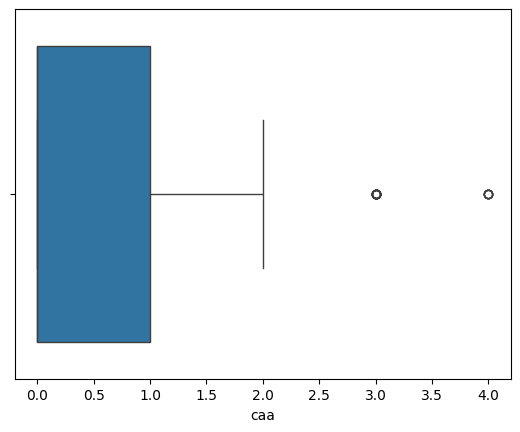

In [23]:
sns.boxplot(x = df["caa"] )

<Axes: xlabel='oldpeak'>

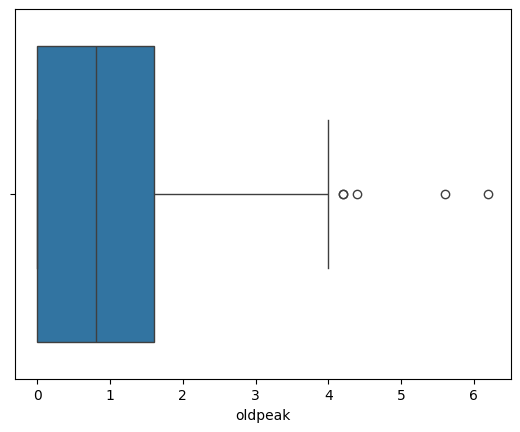

In [24]:
sns.boxplot(x = df["oldpeak"] )

<Axes: xlabel='thalachh'>

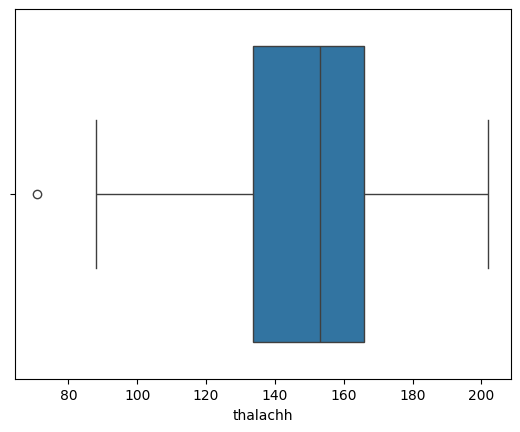

In [25]:
sns.boxplot(x = df["thalachh"] )

<Axes: xlabel='chol'>

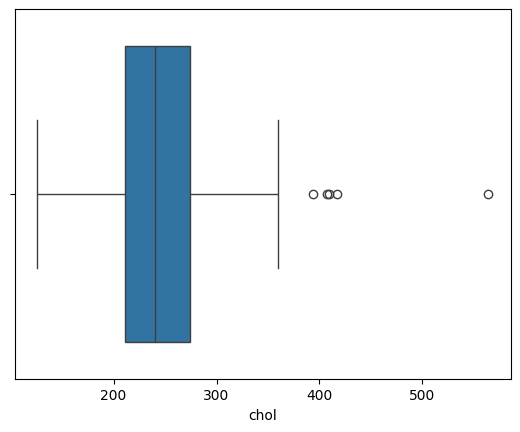

In [26]:
sns.boxplot(x = df["chol"] )

In [29]:
a = ["chol" ,"oldpeak" ,"caa" ]

for col in a:
    # 1. IQR Hesabı
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # 2. Sınırlar
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 3. Aykırı olmayanların ortalamasını al
    mean_val = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)][col].mean()

    # 4. Aykırı olanları ortalama ile değiştir
    df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = mean_val

<ipython-input-29-dba20627a7bb>:17: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '243.04362416107384' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

<ipython-input-29-dba20627a7bb>:17: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5071942446043165' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



<Axes: xlabel='caa'>

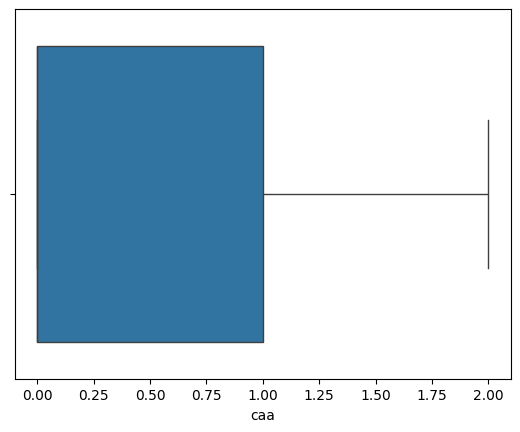

In [32]:
sns.boxplot(x = df["caa"] )

<Axes: xlabel='oldpeak'>

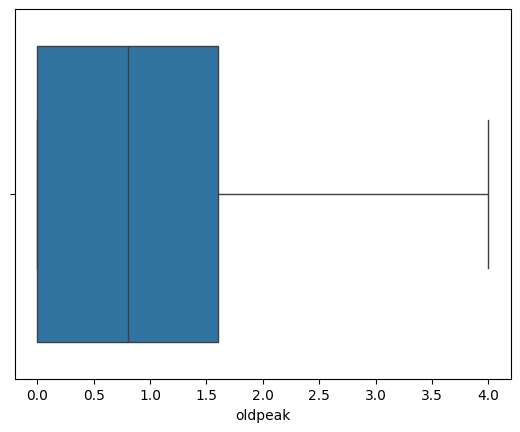

In [33]:
sns.boxplot(x = df["oldpeak"] )

<Axes: xlabel='chol'>

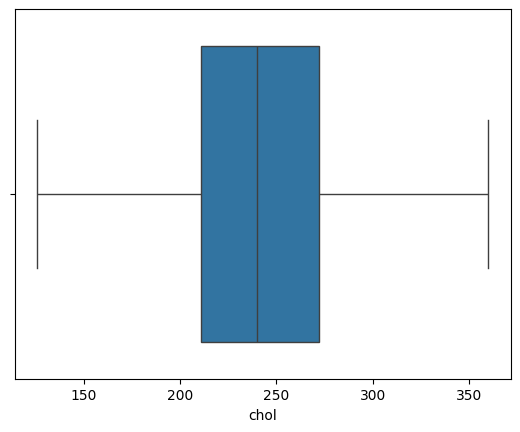

In [34]:
sns.boxplot(x = df["chol"] )

In [35]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233.0,1,0,150,0,2.3,0,0.0,1,1
1,37,1,2,130,250.0,0,1,187,0,3.5,0,0.0,2,1
2,41,0,1,130,204.0,0,0,172,0,1.4,2,0.0,2,1
3,56,1,1,120,236.0,0,1,178,0,0.8,2,0.0,2,1
4,57,0,0,120,354.0,0,1,163,1,0.6,2,0.0,2,1


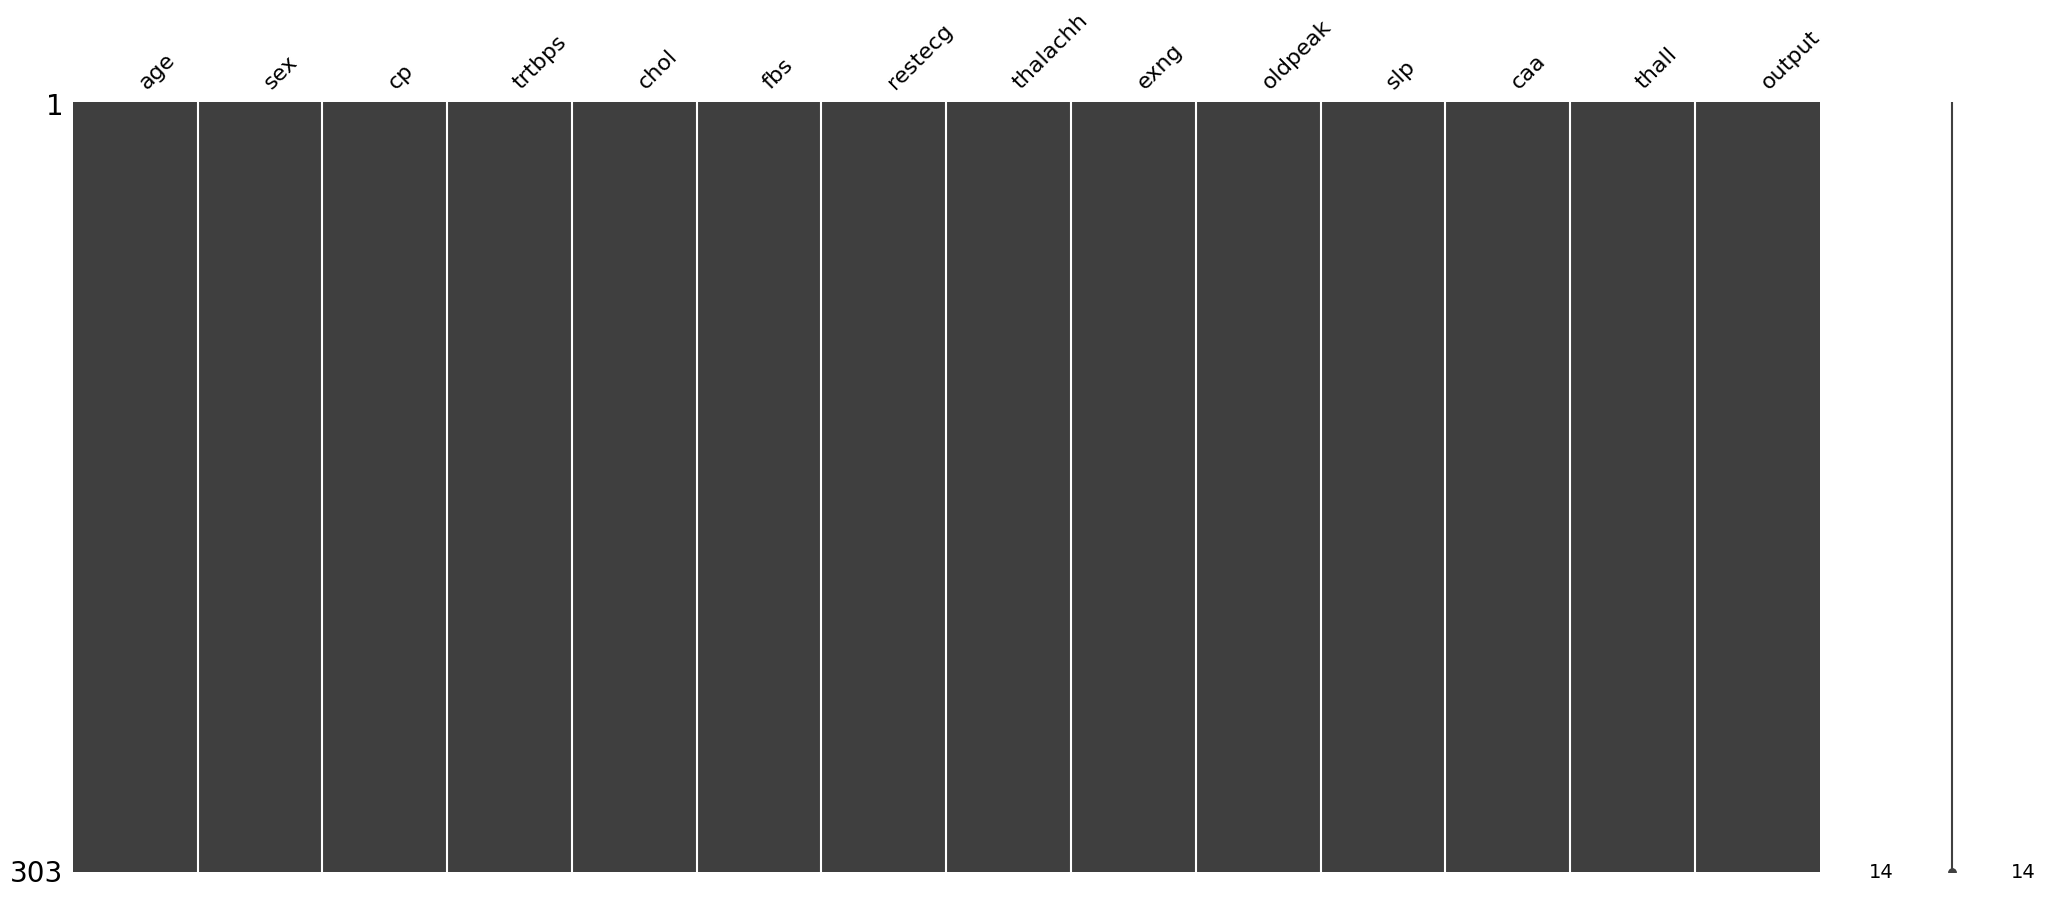

In [36]:
msno.matrix(df)
plt.show()

In [37]:
X = df.drop("output" , axis = 1).values
y = df["output"].values

In [38]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


In [39]:
print(X)

[[63.  1.  3. ...  0.  0.  1.]
 [37.  1.  2. ...  0.  0.  2.]
 [41.  0.  1. ...  2.  0.  2.]
 ...
 [68.  1.  0. ...  1.  2.  3.]
 [57.  1.  0. ...  1.  1.  3.]
 [57.  0.  1. ...  1.  1.  2.]]


In [42]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 42)

In [43]:
# normalizasyon
x_train_max = np.max(X_train)
x_train_min = np.min(X_train)
X_train = (X_train - x_train_min) / (x_train_max - x_train_min)
X_test = (X_test - x_train_min) / (x_train_max - x_train_min)

In [45]:
models = [("DTC" , DecisionTreeClassifier(max_depth=3)) ,
          ("RFC" , RandomForestClassifier())]

finalResult = []
cmList = []

for name , model in models :
  model.fit(X_train , y_train)
  model_result = model.predict(X_test)
  score = precision_score(y_test, model_result, zero_division=0)
  finalResult.append((name , score))
  cm = confusion_matrix(y_test , model_result)
  cmList.append( cm)

print(finalResult)

[('DTC', 0.8085106382978723), ('RFC', 0.8301886792452831)]


In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
y_pred = model.predict(X_test)  # Modelin tahmini
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
f1_score(y_test, y_pred, average='macro')  # veya 'weighted'


Accuracy: 0.8351648351648352
Precision: 0.8301886792452831
Recall: 0.88
F1 Score: 0.8543689320388349


0.832247757158658

In [47]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81        41
           1       0.83      0.88      0.85        50

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91

Confusion Matrix:
 [[32  9]
 [ 6 44]]
